#### The goal is to use the Random Forest Classification algorithm to obtain results for the different attack categories found in the KDDcup99 dataset. The results are to be displayed in the form of a plot with varying values for the depth of the decision trees. 

In [1]:
# Import data
import pandas as pd
import numpy as np
data = pd.read_csv('KDDTrain+.txt')

In [2]:
# Remove Difficulty Level
data = data.drop('20', axis = 1)
data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [3]:
data = data.to_numpy()
print(type(data))

<class 'numpy.ndarray'>


In [4]:
# Separate source and target variables
X = data[:,:-1]
y_og = data[:, len(data[0])-1]
print(set(y_og))

{'multihop', 'imap', 'phf', 'buffer_overflow', 'guess_passwd', 'neptune', 'rootkit', 'nmap', 'land', 'back', 'ftp_write', 'satan', 'normal', 'smurf', 'warezmaster', 'ipsweep', 'warezclient', 'pod', 'teardrop', 'spy', 'perl', 'loadmodule', 'portsweep'}


In [5]:
# Remove Categorical Features
X_no_cat = np.delete(X,[1,2,3],1)
print(X_no_cat.shape)
print(y_og.shape)

# Double check to make sure all were removed
print(X_no_cat[0,:])

(125972, 38)
(125972,)
[0 146 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 13 1 0.0 0.0 0.0 0.0 0.08 0.15
 0.0 255 1 0.0 0.6 0.88 0.0 0.0 0.0 0.0 0.0]


In [6]:
# Take a Random Sample
sample_indices = np.random.choice(range(len(y_og)), 59000)
X_sample = X_no_cat[sample_indices,:]
y = y_og[sample_indices]
print(X_sample.shape)
print(y.shape)

(59000, 38)
(59000,)


In [7]:
# Assign each attack type to a numerical representation of an attack category

for i in range(X_sample.shape[0]):
  
    if(y[i]=='normal'):
        y[i] = 1
    
# dos
    if(y[i]=='neptune'or y[i]=='smurf'or y[i]=='pod' or y[i]=='teardrop' or y[i]=='land' or y[i]=='back'):
        y[i] = 2

# u2r
    if(y[i]=='buffer_overflow' or y[i]=='loadmodule' or y[i]=='perl' or y[i]=='rootkit'):
        y[i] = 3
    
# r2l 
    if(y[i]=='guess_passwd' or y[i]=='ftp_write' or y[i]=='imap' or y[i]=='phf' or y[i]=='multihop' or y[i]=='warezmaster' or y[i]=='warezclient' or y[i]=='spy'):
        y[i] = 4

# probe
    if(y[i]=='portsweep' or y[i]=='ipsweep' or y[i]=='nmap' or y[i]=='satan'):
        y[i] = 5

In [8]:
print(set(y))

{1, 2, 3, 4, 5}


In [9]:
y = np.int64(y)
print(y[40700:40800])
print(set(y))
print(type(y))

[1 1 2 1 5 2 1 2 2 2 2 2 2 2 1 1 2 1 2 1 1 1 5 2 2 2 5 1 1 2 2 1 1 1 2 1 1
 2 1 5 2 2 1 2 5 2 2 2 1 2 5 2 1 2 1 2 1 2 2 2 2 2 2 2 2 1 1 1 1 2 1 2 5 1
 5 1 1 2 2 2 1 2 2 1 2 1 1 2 2 1 2 2 2 1 2 2 1 2 1 1]
{1, 2, 3, 4, 5}
<class 'numpy.ndarray'>


In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_sample, y, test_size=0.33, random_state=42)

In [11]:
print(set(y_train))
print(set(y_test))

{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score

recall_scores = []
precision_scores = []
f1_scores = []


def calculations(n):
    
    clf = RandomForestClassifier(max_depth = n, random_state = 42)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_pred = np.array(y_pred)
    
    precision,recall,fscore,support=score(y_test,y_pred,average='macro')
    
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(fscore)

In [13]:
ilist = []
i = 20
while i<600:
    calculations(i)
    ilist.append(i)
    i=i*2

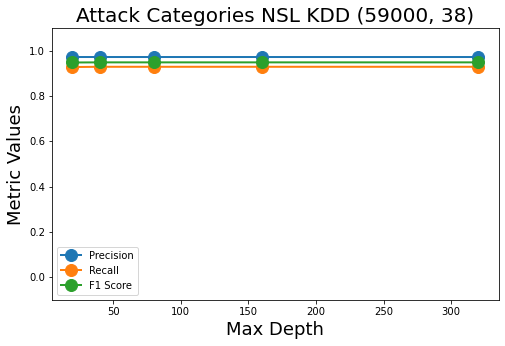

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))

plt.plot(ilist, precision_scores, marker='o', linewidth=2, markersize=12, label = 'Precision')
plt.plot(ilist, recall_scores, marker='o', linewidth=2, markersize=12, label = 'Recall')
plt.plot(ilist, f1_scores, marker='o', linewidth=2, markersize=12, label = 'F1 Score')

    
plt.xlabel('Max Depth', fontsize = 18)
plt.ylabel('Metric Values', fontsize = 18)
plt.title('Attack Categories NSL KDD (59000, 38)', fontsize = 20)  
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.show()

In [15]:
print(max(precision_scores))
print(max(recall_scores))

0.9719033217369113
0.9287538102195929


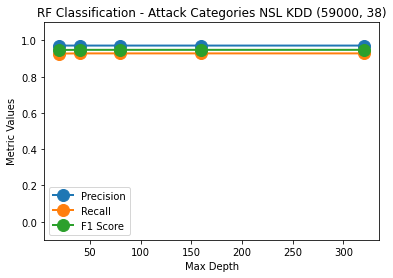

In [16]:

#     plt.plot(ilist, recall_scores, label='Recall')
#     plt.plot(ilist, precision_scores, label='Precison')
#     plt.plot(ilist, f1_scores,label='F1')
    
plt.xlabel('Max Depth')
plt.ylabel('Metric Values')
plt.title('RF Classification - Attack Categories NSL KDD (59000, 38)')
    
plt.plot(ilist, precision_scores, marker='o', linewidth=2, markersize=12, label = 'Precision')
plt.plot(ilist, recall_scores, marker='o', linewidth=2, markersize=12, label = 'Recall')
plt.plot(ilist, f1_scores, marker='o', linewidth=2, markersize=12, label = 'F1 Score')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))
    
plt.show()

In [17]:
print(max(precision_scores))
print(max(recall_scores))

0.9719033217369113
0.9287538102195929


In [18]:
print(X_train.shape)
print(X_test.shape)

(39530, 38)
(19470, 38)


In [19]:
print(precision_scores)

[0.9718974620608115, 0.9719033217369113, 0.9719033217369113, 0.9719033217369113, 0.9719033217369113]
